<p style="font-family: Candara; line-height: 2; font-size: 31px; font-weight: bold; letter-spacing: 1px; text-align: center; color: #01796F">Prototype: Land Attributes and SDGs Data Visualization</p>

<hr style="height: 0.5px; border: 0; background-color: #342D7E">

<a class="anchor" id="part1"></a>
# <span style="font-family: candara; font-size: 25px; font-style: normal; font-weight: bold; letter-spacing: 3px; text-align: center; color:  #01796F; line-height:1.0">1. Introduction to South Africa's Sustainable Development Goals (SDGs) </span>

<a class="anchor" id="part1"></a>

<hr style="height: 0.5px; border: 0; background-color: #342D7E">

South Africa, like many countries, is committed to the pursuit of Sustainable Development Goals (SDGs) to address complex challenges such as poverty reduction, environmental sustainability, and social equality. The country's journey towards achieving these goals involves understanding the relationships between specific land attributes and the various SDGs. Land use, land quality, and related factors play a crucial role in South Africa's progress towards sustainable development objectives.

This Jupyter Notebook project aims to create a data visualization prototype that effectively represents the relationships between distinct land attributes and the SDGs in the context of South Africa. Through this visualization, we intend to gain insights into how particular land characteristics impact the achievement of sustainable development goals within the South African landscape.



# <span style="font-family: candara; font-size: 25px; font-style: normal; font-weight: bold; letter-spacing: 3px; text-align: center; color:  #01796F; line-height:1.0">2. Project Workflow </span>

<hr style="height: 0.5px; border: 0; background-color: #342D7E">

This project is organized into the following steps:

1. **Setup**: Install the necessary libraries.
2. **Import Libraries**: Import the Python libraries required for this project.
3. **Load Data**: Load the South Africa-specific dataset into a Pandas DataFrame.
4. **Create Data Visualization**: Generate a visual to represent the relationships between land attributes and the SDGs relevant to South Africa.


<a class="anchor" id="part2"></a>
# <span style="font-family: candara; font-size: 25px; font-style: normal; font-weight: bold; letter-spacing: 3px; text-align: center; color:  #01796F; line-height:1.0">3. Import necessary libraries </span>


<hr style="height: 0.5px; border: 0; background-color: #342D7E">

This project leverages the following tools and libraries:

- Jupyter Notebook: An interactive environment for data analysis and visualization.
- Python: The programming language for data manipulation and visualization.
- Matplotlib: A popular Python library for creating data visualizations.
- Pandas: A library for data manipulation and analysis.

In [1]:
# Import necessary libraries
import geopandas as gpd
import io, requests , fiona

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


<a class="anchor" id="part3"></a>
# <span style="font-family: candara; font-size: 25px; font-style: normal; font-weight: bold; letter-spacing: 3px; text-align: center; color:  #01796F; line-height:1.0">4. Import Data </span>

<hr style="height: 0.5px; border: 0; background-color: #342D7E"> 


# <span style="font-family: candara; font-size: 18px; font-style: normal; font-weight: bold; letter-spacing: 3px; text-align: center; color:  #01796F; line-height:1.0">4.1 About the Dataset </span>



The dataset used for this project (assumed to be in 'south_africa_land_sdgs_data.csv') includes information specific to South Africa, such as land attributes and their connection to the SDGs. These attributes may encompass aspects like agricultural practices, land conservation efforts, and urban development strategies within the country.


In [2]:
"""
This code reads a JSON or GeoJSON file from a link and returns a DataFrame 
(assuming you have pandas, geopandas, fiona and requests installed)

"""

def get_df(link):
    """
    Inputs a link to a JSON/GeoJSON file and returns a DataFrame
    """
    try:
        # Try reading the file directly
        return gpd.read_file(link)
    except Exception as e:
        print(f"Error: {e}")
        print("Retrieving the DataFrame from the URL.")

        try:
            # Retrieve data from the URL
            req = requests.get(link).content
            # Read the content as a GeoDataFrame
            return gpd.read_file(io.StringIO(req.decode('utf-8')))
        except Exception as e:
            print(f"Failed to retrieve data from the URL: {e}")
            return pd.DataFrame()

In [3]:
df_bio = get_df(r"C:\O\Outreachy_Siziwe_2023\CI_BiodiversityHotspots.geojson")

In [4]:
# display the dataset
df_bio.head(2)

,OBJECTID,NAME,Type,Shape_Length,Shape_Area,geometry
0,1,Chilean Winter Rainfall and Valdivian Forests,hotspot area,200.706891,40.754665,"MULTIPOLYGON (((-74.59792 -46.92502, -74.61111..."
1,2,Chilean Winter Rainfall and Valdivian Forests,outer limit,191.174978,186.085694,"POLYGON ((-70.30946 -22.96028, -70.48596 -22.7..."


In [5]:
df_bio.shape

(53, 6)

In [6]:
# Convert the geographical data to a DataFrame
df_bio = pd.DataFrame(df_bio)


 
 # <span style="font-family: candara; font-size: 25px; font-style: normal; font-weight: bold; letter-spacing: 3px; text-align: center; color:  #01796F; line-height:1.0">5. Mapping the Biodiversity data to SDG</span>

In [7]:
# dataset for region-to-SDG mapping
region_data = {
    'NAME': ['Cape Floristic Region', 'Succulent Karoo', 'Maputaland-Pondoland-Albany'],
    'SDGs': ['SDG 14: Life Below Water', 'SDG 15 (Life on Land)', 'SDG 13: Climate Action']  # SDG values
}
# Convert the region-to-SDG mapping data to a DataFrame
region_df = pd.DataFrame(region_data)

In [8]:

# Merge the datasets on 'NAME' to associate regions with SDGs
merged_df = df_bio.merge(region_df, on='NAME')

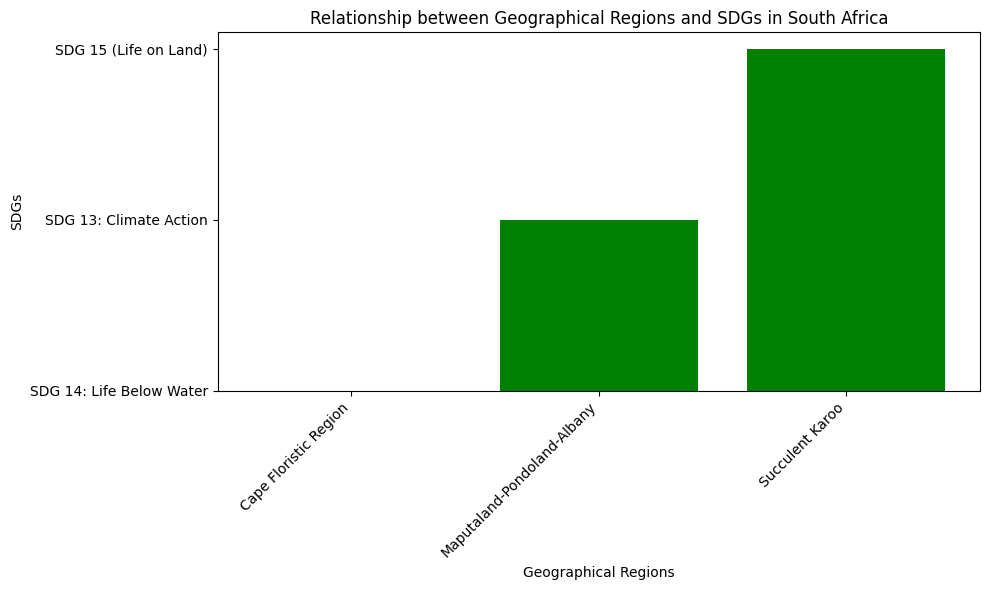

In [9]:
# Create a bar chart to represent the relationships between regions and SDGs
plt.figure(figsize=(10, 6))
plt.bar(merged_df['NAME'], merged_df['SDGs'], color='green')
plt.title('Relationship between Geographical Regions and SDGs in South Africa')
plt.xlabel('Geographical Regions')
plt.ylabel('SDGs')
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()

 
 # <span style="font-family: candara; font-size: 25px; font-style: normal; font-weight: bold; letter-spacing: 3px; text-align: center; color:  #01796F; line-height:1.0">6. Mapping : Soil Resources to SDG</span>
 

In [10]:

df_sa_sr = get_df(r"C:\O\Outreachy_Siziwe_2023\ZAF_AL2_South Africa_WSR.json")

In [11]:
df_sa_sr.head()

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,ZAF,,South Africa,AR,3,Arenosol,2,"MULTIPOLYGON (((18.37193 -33.96066, 18.37205 -..."
1,ZAF,,South Africa,CL,29,Calcisol,2,"MULTIPOLYGON (((25.32940 -30.07544, 25.33212 -..."
2,ZAF,,South Africa,DU,10,Durisol,2,"POLYGON ((20.24872 -28.32847, 20.21667 -28.224..."
3,ZAF,,South Africa,LP,18,Leptosol,2,"MULTIPOLYGON (((21.47493 -33.43787, 21.17895 -..."
4,ZAF,,South Africa,LV,12,Luvisol,2,"MULTIPOLYGON (((19.34484 -34.58384, 19.34479 -..."


In [12]:
# Convert the geographical data to a DataFrame
df_sa_sr = pd.DataFrame(df_sa_sr)

In [13]:
#Data with land attributes and their mappings to SDGs
data = {
    'Country': ['South Africa', 'South Africa', 'South Africa', 'South Africa', 'South Africa'],
    'Land Type': ['Arenosol', 'Calcisol', 'Durisol', 'Leptosol', 'Luvisol'],
    'IPCC': ['AR', 'CL', 'DU', 'LP', 'LV'],
    'SDGs Mapped': ['SDG 15 (Life on Land)', 'SDG 6 (Clean Water and Sanitation)', 'SDG 9 (Industry, Innovation, and Infrastructure)', 'SDG 11 (Sustainable Cities and Communities)', 'SDG 2 (Zero Hunger)']
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

In [14]:

# Merge the datasets on 'NAME' to associate regions with SDGs
merged_df = df_sa_sr.merge(df, on='IPCC')

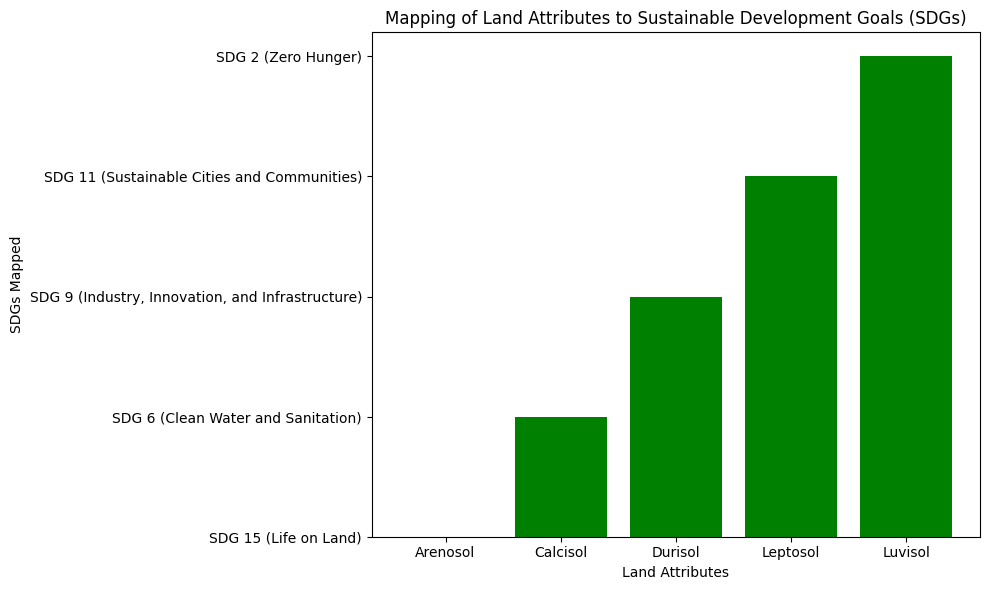

In [15]:
# Create a bar chart to represent the mappings of land attributes to SDGs
plt.figure(figsize=(10, 6))
plt.bar(df['Land Type'], range(len(df)), color='green')
plt.title('Mapping of Land Attributes to Sustainable Development Goals (SDGs)')
plt.xlabel('Land Attributes')
plt.ylabel('SDGs Mapped')
plt.yticks(range(len(df)), df['SDGs Mapped'])

# Display the chart
plt.tight_layout()
plt.show()

<a class="anchor" id="part10"></a>
# <span style="font-family: candara; font-size: 25px; font-style: normal; font-weight: bold; letter-spacing: 2px; text-align: center; color:  #01796F; line-height:1.0"> 9.REFERENCES </span>

<hr style="height: 0.5px; border: 0; background-color: #342D7E"> 

1. United Nations. (2015). Transforming our world: the 2030 Agenda for Sustainable Development. Retrieved from [https://sustainabledevelopment.un.org/post2015/transformingourworld](https://sustainabledevelopment.un.org/post2015/transformingourworld)

2. South African National Biodiversity Institute. (n.d.). Biodiversity and Conservation. Retrieved from [https://www.sanbi.org/](https://www.sanbi.org/)


